In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from math import floor,ceil

from sklearn.svm import LinearSVC

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

Using Theano backend.


In [2]:
def rating_to_polarity(rating):
    if rating > 3:
        return 1
    return 0

def score_to_rating(score):
    rating = score*2+3
    return int(round(rating))

In [3]:
data = pd.read_csv('dataset/Reviews_uniform_25000.csv',header=0,index_col=0,encoding='utf-8')
data = data.sample(n=15000,random_state=1)
# data = data[data.Score != 3]
data = data.dropna(how='any')

In [4]:
summaries = data.Summary
# summaries = data.Text
ratings = data.Score

In [5]:
vectorizer = TfidfVectorizer(max_df=.8)
vectorizer.fit(summaries)

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.8, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [6]:
X = vectorizer.transform(summaries).toarray()
# y = ((ratings-3)/2.0).values    # for polarity score
# y = ratings.map(rating_to_polarity).values      # for polarity classification
# y = ratings.values       # for rating classification
y = to_categorical(ratings.values)      # for rating classification

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [8]:
model = Sequential()
model.add(Dense(128,input_dim=X_train.shape[1]))

# model.add(Dense(1,activation='sigmoid'))         # for polarity classification
# model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

model.add(Dense(6,activation='softmax'))         # for rating classification
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

# model.add(Dense(1,activation='tanh'))         # for polarity score
# model.compile(loss='mean_squared_error',optimizer='rmsprop',metrics=['mean_squared_error'])

model.fit(X_train,y_train,nb_epoch=10,batch_size=32,verbose=1)
model.evaluate(X_test,y_test)[1]

Epoch 1/10
11998/11998 [==============================] - 9s - loss: 1.4664 - acc: 0.4127     
Epoch 2/10
11998/11998 [==============================] - 7s - loss: 1.1943 - acc: 0.5263     
Epoch 3/10
11998/11998 [==============================] - 8s - loss: 1.0990 - acc: 0.5738     
Epoch 4/10
11998/11998 [==============================] - 9s - loss: 1.0372 - acc: 0.6069     
Epoch 5/10
11998/11998 [==============================] - 8s - loss: 0.9888 - acc: 0.6281     
Epoch 6/10
11998/11998 [==============================] - 7s - loss: 0.9494 - acc: 0.6419     
Epoch 7/10
11998/11998 [==============================] - 10s - loss: 0.9171 - acc: 0.6554    
Epoch 8/10
11998/11998 [==============================] - 11s - loss: 0.8904 - acc: 0.6684    
Epoch 9/10
11998/11998 [==============================] - 11s - loss: 0.8690 - acc: 0.6729    
Epoch 10/10
2976/3000 [============================>.] - ETA: 0s

0.44866666666666666

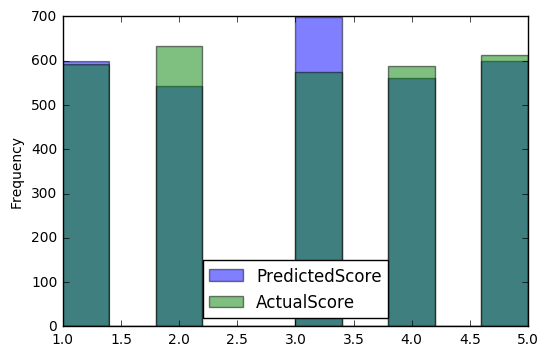

In [9]:
preds = model.predict(X_test)
out = []
for i in range(len(preds)):
#     out.append([preds[i][0],y_test[i]])     # for polarity score/classification
    out.append([preds[i].argmax(),y_test[i].argmax()])    # for rating classification

out = pd.DataFrame(out,columns=['PredictedScore','ActualScore'])
# out = out.applymap(score_to_rating)
out.plot.hist(alpha=0.5)

In [10]:
accuracy_score(out.PredictedScore,out.ActualScore)

0.44866666666666666

In [11]:
print data.shape,X_train.shape,X_test.shape

(14998, 3) (11998, 6371) (3000, 6371)
